# Differentiating handwritten digits.

## PCA project

Imagine we are working on an image recognition service for a postal service. It would be beneficial to be able to read the digits automatically, even if they are handwritten. (Quick note: this is how modern postal services work for a long time now, and it's more accurate than a human). We want to know which handwritten numbers are the hardest to tell apart so we can focus on getting more labeled examples of that data. 

We can use a dataset of handwritten digits to perform PCA to get better insight into which numbers are easily separable from the rest.


### Data

    Background:

    E. Alpaydin, Fevzi. Alimoglu
    Department of Computer Engineering
    Bogazici University, 80815 Istanbul Turkey
    alpaydin '@' boun.edu.tr


#### Data Set Information from Original Authors:

We created a digit database by collecting 250 samples from 44 writers. The samples written by 30 writers are used for training, cross-validation and writer dependent testing, and the digits written by the other 14 are used for writer independent testing. This database is also available in the UNIPEN format.

We use a WACOM PL-100V pressure sensitive tablet with an integrated LCD display and a cordless stylus. The input and display areas are located in the same place. Attached to the serial port of an Intel 486 based PC, it allows us to collect handwriting samples. The tablet sends $x$ and $y$ tablet coordinates and pressure level values of the pen at fixed time intervals (sampling rate) of 100 miliseconds.

These writers are asked to write 250 digits in random order inside boxes of 500 by 500 tablet pixel resolution. Subject are monitored only during the first entry screens. Each screen contains five boxes with the digits to be written displayed above. Subjects are told to write only inside these boxes. If they make a mistake or are unhappy with their writing, they are instructed to clear the content of a box by using an on-screen button. The first ten digits are ignored because most writers are not familiar with this type of input devices, but subjects are not aware of this.

SOURCE: https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits

### Preprocessing

In [1]:
#import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
digits = pd.read_csv('../DATA/digits.csv')

In [3]:
digits

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number_label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [4]:
#drop target in df
pixels = digits.drop('number_label', axis=1)

In [5]:
pixels.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


### EDA

**Visualize a single image row representation by getting the first row of the pixels DataFrame.**

In [6]:
#grab first row
first_row = pixels.iloc[0,:]
first_row

pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     5.0
pixel_0_3    13.0
pixel_0_4     9.0
             ... 
pixel_7_3    13.0
pixel_7_4    10.0
pixel_7_5     0.0
pixel_7_6     0.0
pixel_7_7     0.0
Name: 0, Length: 64, dtype: float64

In [7]:
#convert to series and reshape
first_row = np.array(first_row).reshape(8,8)
first_row

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<AxesSubplot:>

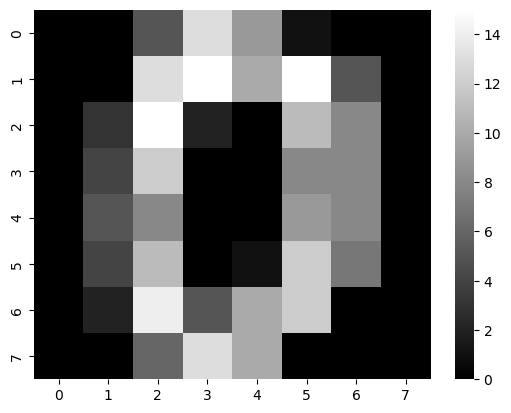

In [8]:
#plot with heatmap
sns.heatmap(first_row, cmap='gray')

<AxesSubplot:>

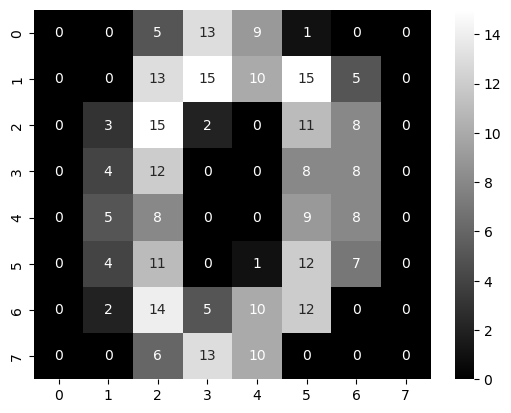

In [9]:
#show annotations
sns.heatmap(first_row, cmap='gray', annot=True)

- From the image above, we can see that the pixels of the first row represent a 'zero'.

### Machine Learning

In [10]:
#Scale data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
pixels_sc = sc.fit_transform(pixels)
pixels_sc

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

**PCA on the scaled pixel data set with 2 components.**

In [11]:
#PCA
from sklearn.decomposition import PCA
pca_model = PCA(n_components = 2)
pca_pixels = pca_model.fit_transform(pixels_sc)

In [12]:
#Variance
pca_model.explained_variance_ratio_

array([0.12033916, 0.09561054])

In [13]:
np.sum(pca_model.explained_variance_ratio_)

0.2159497039519495

- The two principal components explain 0.216 of the total variance. This low number means that predictions might not be as accurate as when using more principal components. However, we can visualize this data in a 2D scatterplot to observe which numbers are easily identifiable.  

**Scatterplot of the digits in the 2 dimensional PCA space**

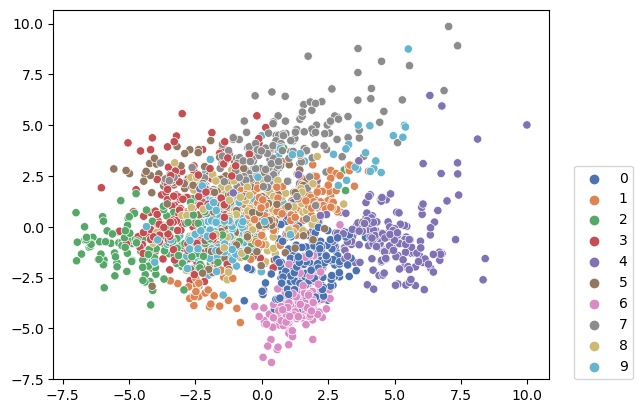

In [14]:
#scatterplot
sns.scatterplot(x=pca_pixels[:,0], y=pca_pixels[:,1], hue=digits['number_label'], palette="deep")
plt.legend(loc=(1.05,0))

- The most distinct numbers are 4, 2, and 6 because those points are clustered in the edge instead of mixed in with the other data. The most challenging numbers to identify are 3 and 8 because they are spread apart in the middle and mixed with other data.

**Interactive 3D plot of the result of PCA with 3 principal components.**

In [15]:
#PCA, 3 components
pca_model = PCA(n_components=3)
pca_pixels = pca_model.fit_transform(pixels_sc)

<IPython.core.display.Javascript object>


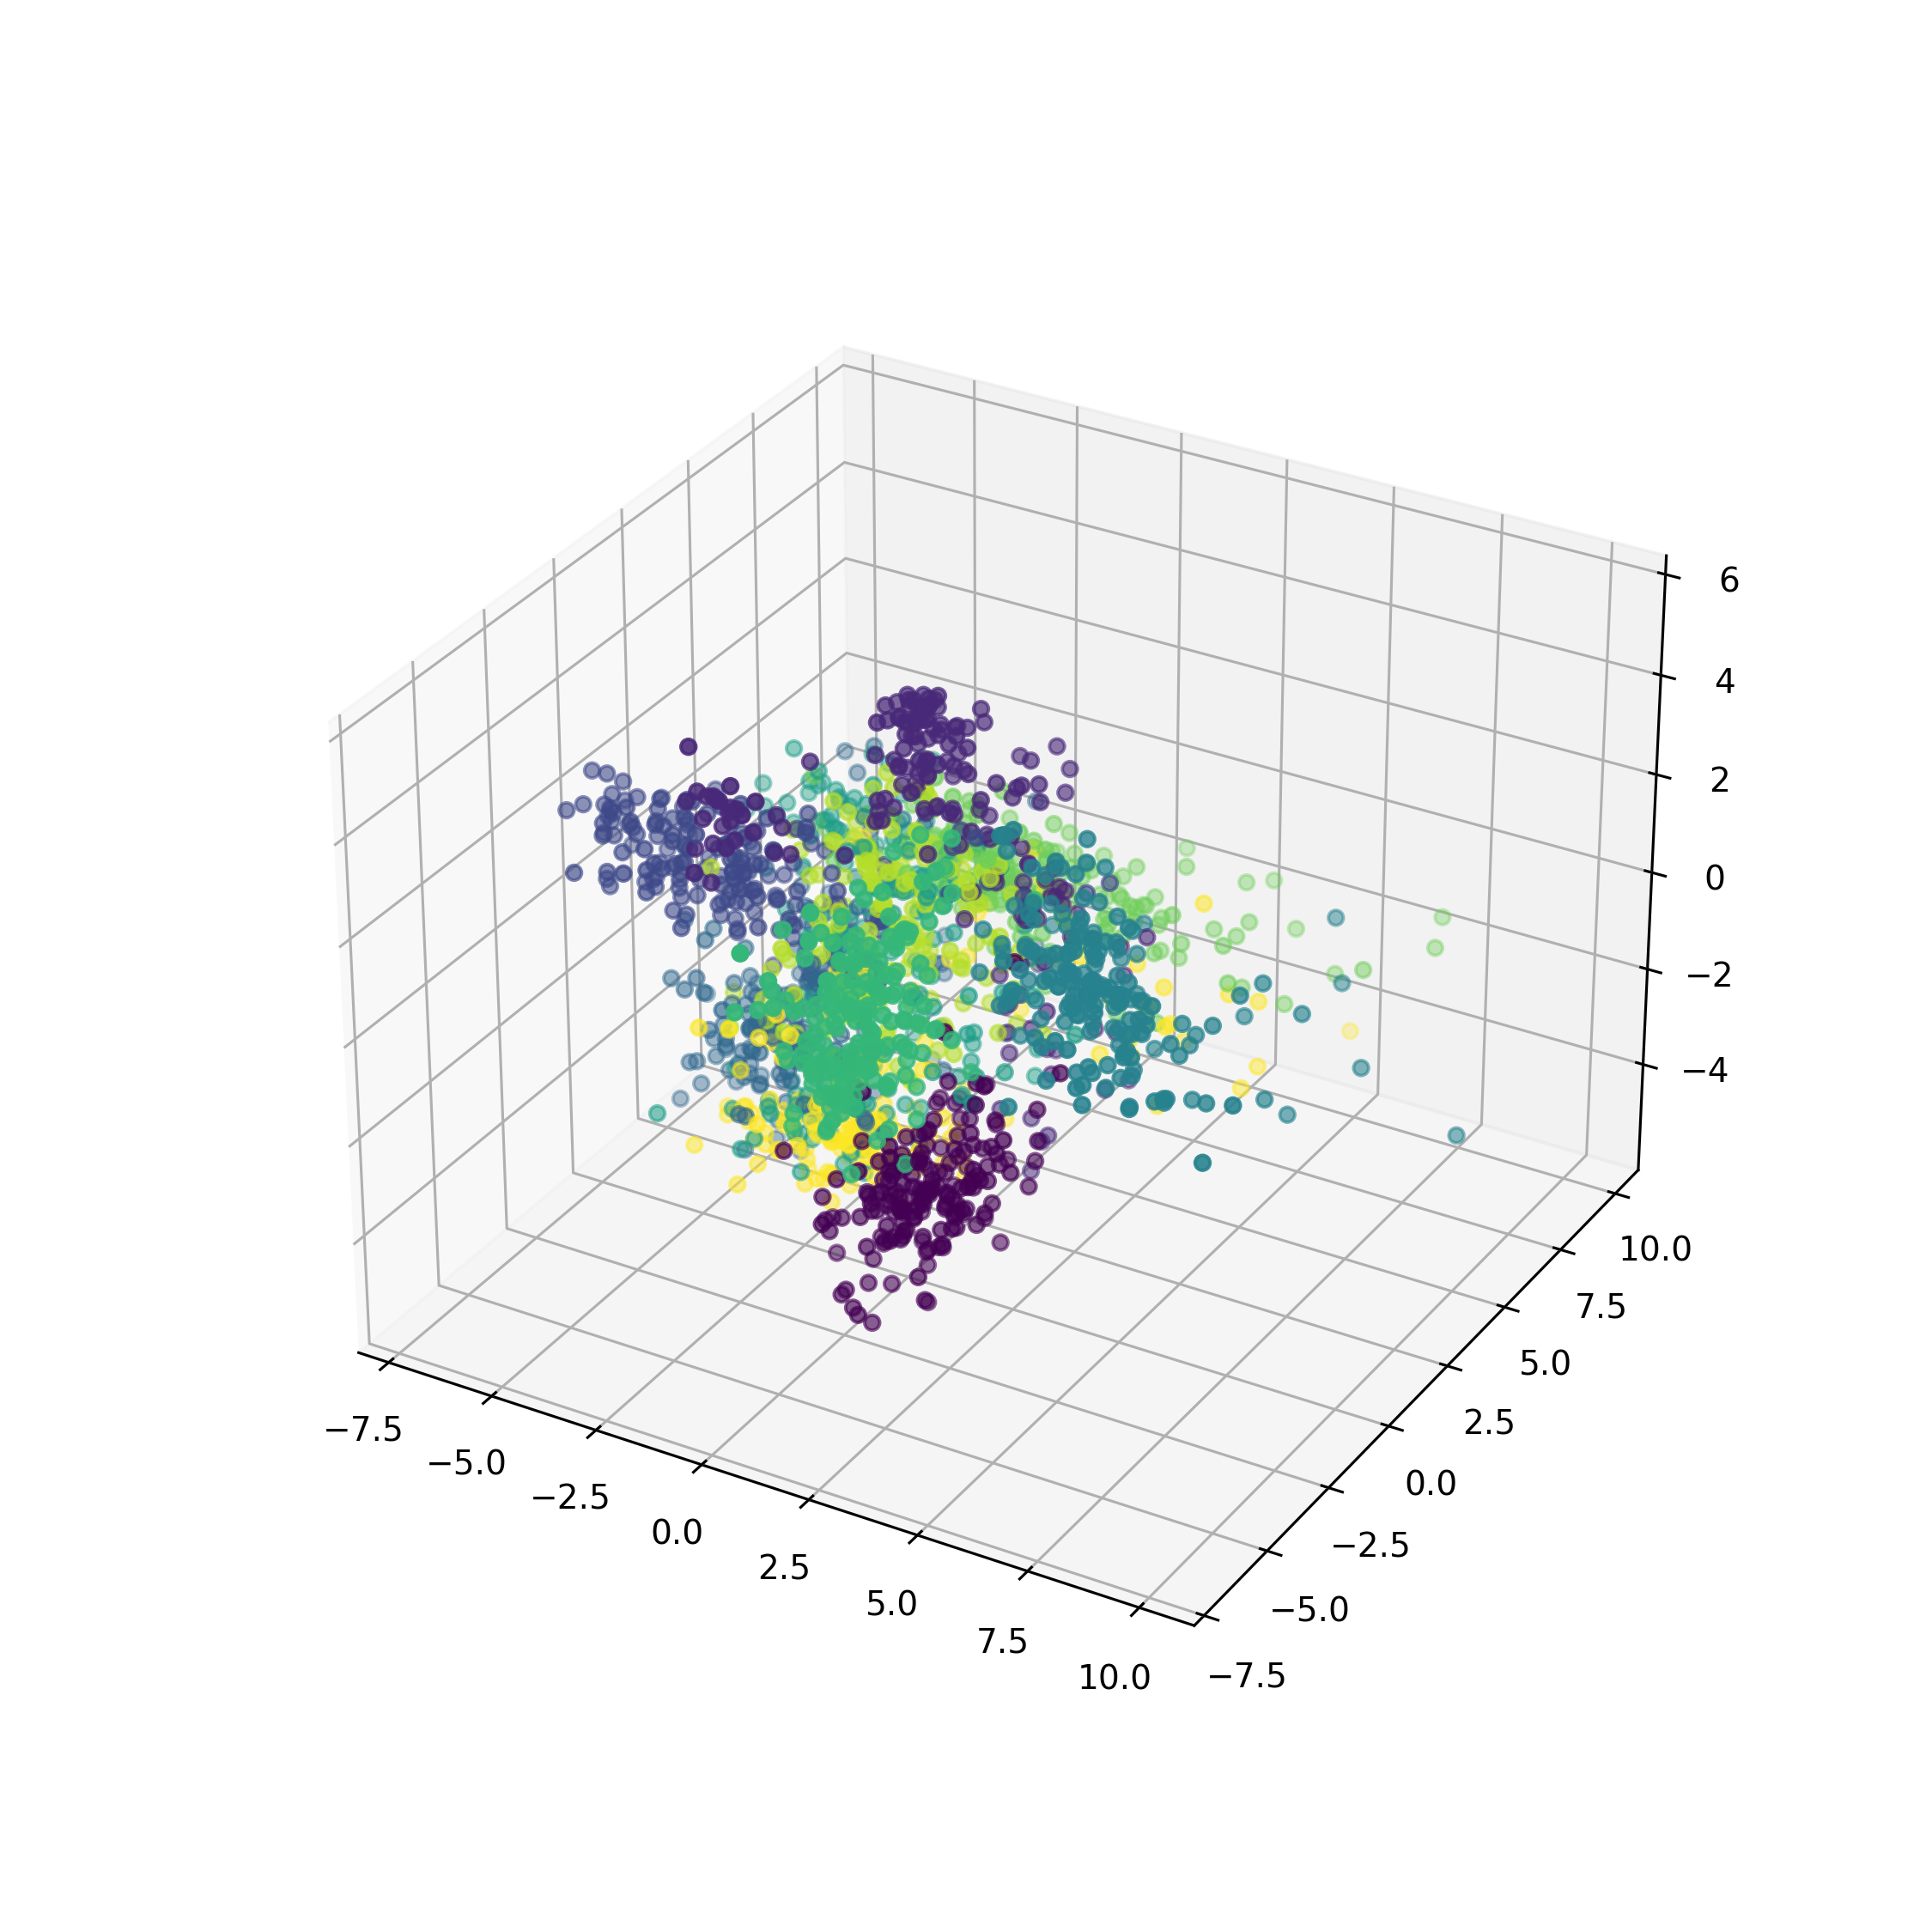

In [16]:
#make image interactive
%matplotlib notebook 
plt.figure(figsize=(8,8), dpi=150)
from mpl_toolkits import mplot3d
ax=plt.axes(projection='3d')
ax.scatter3D(pca_pixels[:,0],pca_pixels[:,1],pca_pixels[:,2], c=digits['number_label'])